<a href="https://colab.research.google.com/github/Mayakshanesht/Bicycle_Tracking_project/blob/main/Tutorial_3_Bayes_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Bayes Theorem:

P(H/Z)=P(Z/H)*P(H)/P(Z)

Posterior probability= Likelihood*Prior probability/Normalizer

In [2]:
def plot_bar(pos,x=None,ylim=(0,1),title=None,c='#30a2da',**kwargs):
  ax=plt.gca()
  if x is None:
    x=np.arange(len(pos))
  ax.bar(x,pos,color=c,**kwargs)
  if ylim:
    plt.ylim(ylim)
  plt.xticks(np.asarray(x),x)
  if title is not None:
    plt.title(title)

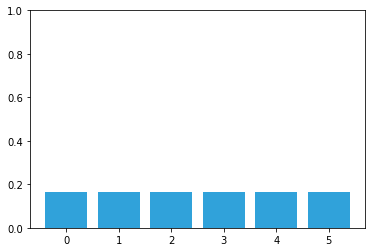

In [ ]:
belief=np.array([1/6,1/6,1/6,1/6,1/6,1/6])
plot_bar(belief)

In [ ]:
!pip install filterpy

In [ ]:
from filterpy.discrete_bayes import normalize, predict, update

In [ ]:
#lets move one steps
def predict1(belief):
  prior_belief=predict(belief,offset=1,kernel=[0.8,0.15,0.05])
  return prior_belief

In [ ]:
#lets update with measurement
def likelihood():
  likelihood=normalize([0.5,0.8,0.4,0.2,0.1,0.1])
  return likelihood

In [ ]:
def update1(likelihood,prior_belief):
  posterior_belief=update(likelihood,prior_belief)
  return posterior_belief

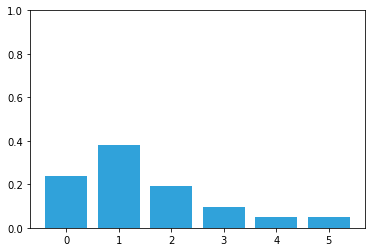

In [ ]:
prior=predict1(belief)
like=likelihood()
post=update1(like,prior)
plot_bar(post)

Gaussian for continuous space

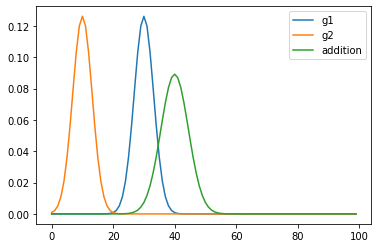

In [ ]:
from filterpy.stats import add, plot_gaussian_pdf,gaussian
mean1 = 3
var1 = .1
mean2 = 1
var2 = .1
x=np.arange(0,10,0.1)
g1 = gaussian(x, mean=mean1, var=var1)
g2 = gaussian(x, mean=mean2, var=var2)

def predict_gaussians(mean1, var1, mean2, var2):
    mean_sum, var_sum = add(mean1,var1, mean2, var2) # element-wise multiplication
    g = gaussian(x, mean=mean_sum, var=var_sum)
    return g
    
g = predict_gaussians(mean1, var1, mean2, var2)

plt.plot(g1, label ='g1')
plt.plot(g2, label='g2')
plt.plot (g, label= 'addition')
plt.legend();

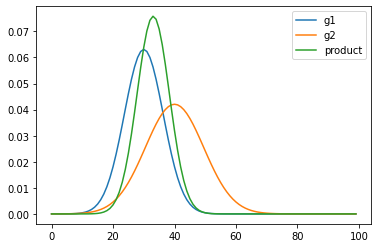

In [ ]:
mean1 = 3
var1 = .4
mean2 = 4
var2 = .9

g1 = gaussian(x, mean=mean1, var=var1)
g2 = gaussian(x, mean=mean2, var=var2)

def update_gaussians(mean1, var1, mean2, var2):
    g = g1 * g2  # element-wise multiplication
    g = g / sum(g)  # normalize
    return g

g = update_gaussians(mean1, var2, mean2, var2)
plt.plot(g1, label ='g1')
plt.plot(g2, label='g2')
plt.plot (g, label= 'product')
plt.legend();